# Linear Regression with Closed-Form and Gradient Descent
It generates synthetic data, fits linear regression using the Normal Equation and Gradient Descent, and compares the results.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Generating synthetic data
np.random.seed(0)
n = 200 # number of samples
x = np.random.uniform(0, 5, size=n) # x values  between 0 and 5
noise_value = np.random.normal(0, 1, size=n) # noise values 
y = 3 + 4 * x + noise_value #linear function

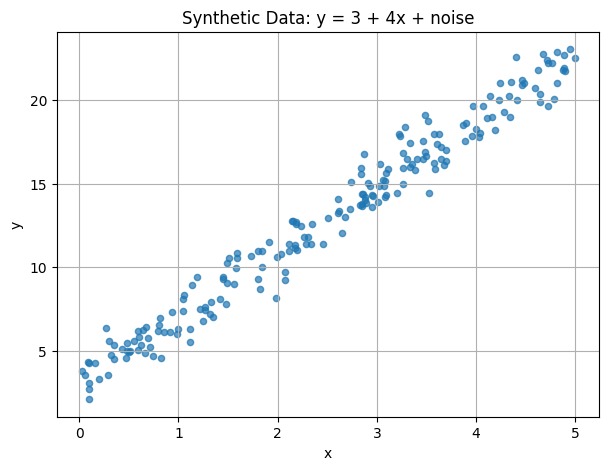

In [12]:
# Plotting raw data
plt.figure(figsize=(7, 5)) 
plt.scatter(x, y, s=20, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Data: y = 3 + 4x + noise")
plt.grid(True)
plt.show()

## Closed-Form Solution (Normal Equation)

In [13]:
# Creating X matrix with bias term 1
X = np.column_stack([np.ones_like(x), x])

# Normal Equation
theta_closed = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
b_closed, w_closed = theta_closed.flatten()

print(f"Closed-form intercept: {b_closed:.4f}")
print(f"Closed-form slope: {w_closed:.4f}")

Closed-form intercept: 3.1069
Closed-form slope: 3.9124


## Gradient Descent Implementation

In [14]:
# Gradient Descent
alpha = 0.05 #Learning Rate
n_iters = 1000 #Number of Iterations

# Initializing theta = [0, 0]
theta_gd = np.zeros(2)
m = len(y)

loss = []
for _ in range(n_iters): #Gradient Descent Loop
    y_pred = X.dot(theta_gd) 
    residuals = y_pred - y
    mse = (residuals**2).mean()    
    loss.append(mse)
    gradient = (2 / m) * (X.T.dot(residuals)) 
    
    theta_gd = theta_gd - alpha * gradient #Theta updating

b_gd, w_gd = theta_gd.flatten() #intercept and slope extracting from theta_gd
print(f"Gradient Descent intercept: {b_gd:.4f}")
print(f"Gradient Descent slope: {w_gd:.4f}")

Gradient Descent intercept: 3.1069
Gradient Descent slope: 3.9124


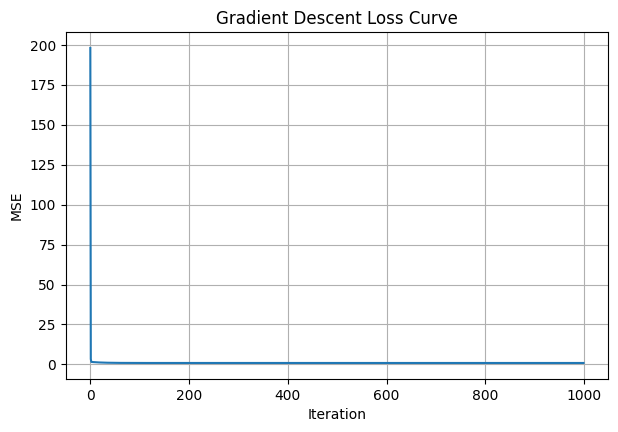

In [15]:
#loss curve (MSE vs iterations)
plt.figure(figsize=(7, 4.5)) #Plotting the loss curve for Gradient Descent
plt.plot(loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent Loss Curve") 
plt.grid(True)
plt.show()

### Gradient Descent and Closed Form Plots

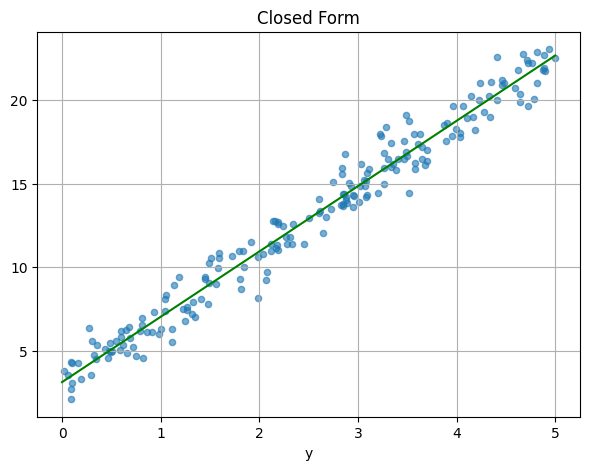

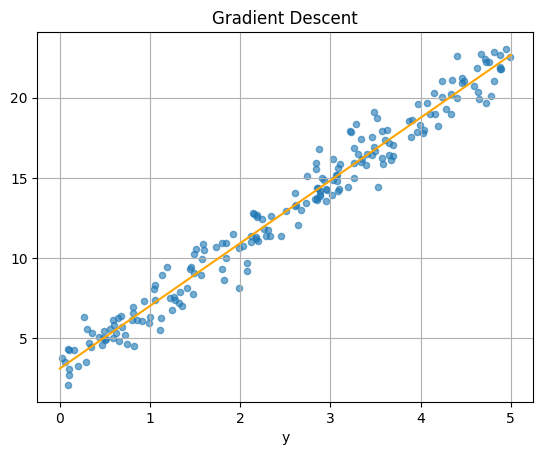

In [16]:
x_line = np.linspace(0, 5, 200) 
y_line_closed = b_closed + w_closed * x_line 
y_line_gd = b_gd + w_gd * x_line #

plt.figure(figsize=(7, 5)) #Plotting data and regression lines
plt.xlabel("x")
plt.xlabel("y")
plt.title("Closed Form") 
plt.scatter(x, y, s=20, alpha=0.6)
plt.plot(x_line, y_line_closed, color="green")
plt.grid(True)
plt.show()
plt.xlabel("x")
plt.xlabel("y")
plt.title("Gradient Descent")
plt.scatter(x, y, s=20, alpha=0.6)
plt.plot(x_line, y_line_gd, color="orange")
plt.grid(True)
plt.show()

### Comparison Plot of Gradient Descent vs Closed Form Solution

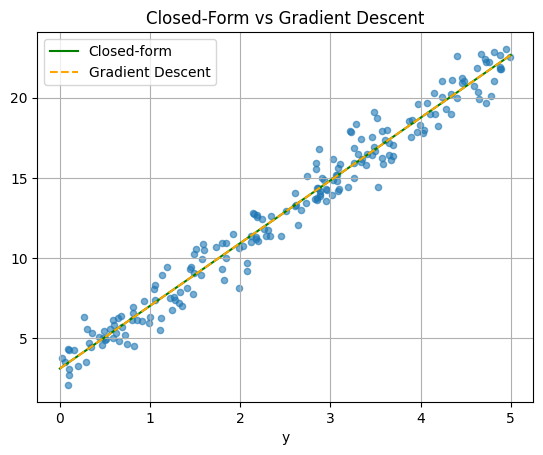

In [17]:
plt.xlabel("x")
plt.xlabel("y")
plt.scatter(x, y, s=20, alpha=0.6)
plt.title("Closed-Form vs Gradient Descent")
plt.plot(x_line, y_line_closed, color="green", label="Closed-form")
plt.plot(x_line, y_line_gd, color="orange", linestyle="--", label="Gradient Descent")
plt.grid(True)
plt.legend()
plt.show()


From the above comparison plot, we can see that both gradient descent and closed form solution converge to the same optimum solution, i.e intercept: 3.1069, slope: 3.9124. 